In [1]:
import glob
from os.path import join, splitext, basename
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
from os import getcwd
import sys
sys.path.append(join(getcwd(), "src"))
import stock_history

In [ ]:
STOCK_DATA_LOC = join('data', 'stocks')
stock_files = glob.glob(join(STOCK_DATA_LOC, '*.csv'))
p = np.random.permutation(range(0,len(stock_files)))

In [34]:
stock_a_name = splitext(basename(stock_files[p[0]]))[0]
stock_a = stock_history.read_stock_history(stock_files[p[0]])
stock_b_name = splitext(basename(stock_files[p[1]]))[0]
stock_b = stock_history.read_stock_history(stock_files[p[1]])

In [ ]:
def 

In [78]:
def do_nothing_portfolio(stock_a, stock_b, 
                         num_shares=(1, 1), trans_cost=0) -> pd.DataFrame:
    """Simulates stock perfomance if left alone
    
    Returns portfolio performance if left alone after over time period
    
    Args:
    stock_a : pandas.DataFrame
    stock_b : pandas.DataFrame
        Dataframes with (ideally) pd.datetime64 indices and prices
        for stocks
    num_shares : (float, float) = (1, 1)
        Number of shares bought in stock A and B
    trans_cost : float = 0
        transaction cost of buying or selling a stock (unused)
        
    Return:a
    portfolio : pandas.DataFrame
        A DataFrame over the same index with net portfolio worth
    """
    if not all(stock_a.index == stock_b.index):
        raise ValueError('stocks are not over same time period')
    
    return num_shares[0] * stock_a + num_shares[1] * stock_b

In [79]:
do_nothing = do_nothing_portfolio(stock_a, stock_b, (0.5, 0.5))

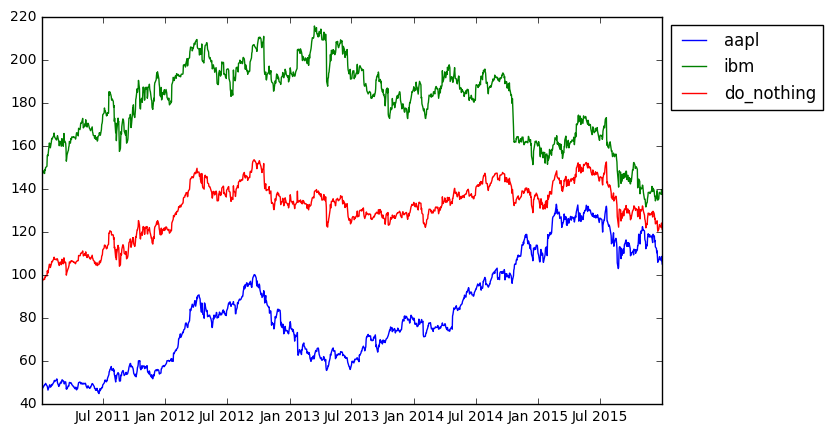

In [80]:
f = plt.figure(figsize=(8, 5))
ax = f.gca()

ax.plot_date(stock_a.index, stock_a, ls='solid', marker='', label=stock_a_name)
ax.plot_date(stock_b.index, stock_b, ls='solid', marker='', label=stock_b_name)
ax.plot_date(do_nothing.index, do_nothing, ls='solid', marker='', label='do_nothing')
ax.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)